Old Code


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 138ms/step - accuracy: 0.6188 - loss: 0.6442 - val_accuracy: 0.7190 - val_loss: 0.5736
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 136ms/step - accuracy: 0.8178 - loss: 0.4633 - val_accuracy: 0.8402 - val_loss: 0.3836
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.9117 - loss: 0.2293 - val_accuracy: 0.8354 - val_loss: 0.4096
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.9650 - loss: 0.1183 - val_accuracy: 0.8264 - val_loss: 0.4554
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 138ms/step - accuracy: 0.9933 - loss: 0.0384 - val_accuracy: 0.8234 - val_loss: 0.5450
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8232 - loss: 0.5506
Test Accuracy: 0.82


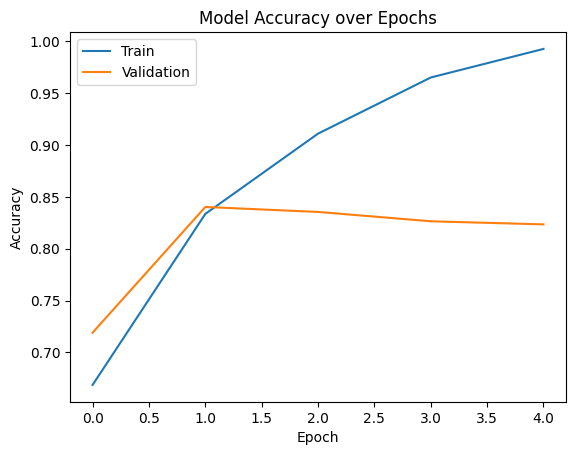

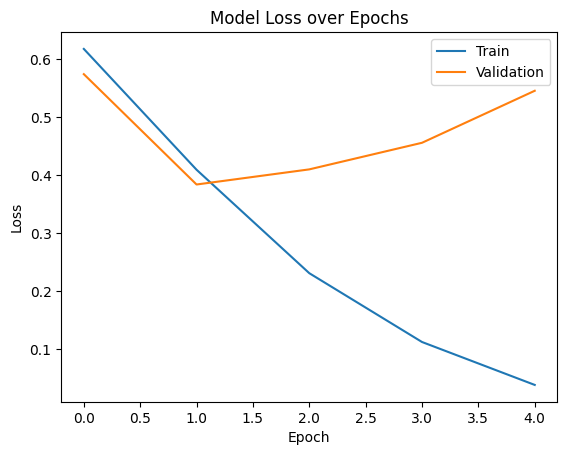

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Predicted Sentiment: Negative


In [ ]:
# 1. Import necessary libraries
import numpy as np  # Import NumPy for numerical computations, arrays, and mathematical operations
from tensorflow.keras.datasets import imdb  # Import the IMDB dataset of movie reviews, preprocessed as integer sequences
from tensorflow.keras.models import Sequential  # Import Sequential model to build a stack of layers in order
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense  # Import neural network layers: embedding, RNN, and fully connected
from tensorflow.keras.preprocessing import sequence  # Import sequence preprocessing utilities for padding/truncating sequences

# 2. Set parameters for the dataset
max_features = 10000  # Consider only the top 10,000 most frequently occurring words in the dataset. Less frequent words will be ignored.
maxlen = 500  # Maximum length of a review in words. Longer reviews will be truncated and shorter ones padded with zeros.

# 3. Load the IMDB dataset
# The dataset returns integer-encoded reviews (each word is replaced by an integer index)
# x_train, y_train: training reviews and labels (0 = negative, 1 = positive)
# x_test, y_test: test reviews and labels
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 4. Pad sequences so that all reviews have the same length
# Neural networks require fixed input sizes, so we pad shorter sequences with zeros at the beginning or end
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)  # Pad or truncate training reviews to maxlen
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)  # Pad or truncate test reviews to maxlen

# 5. Build the RNN model
model = Sequential()  # Initialize an empty sequential model to stack layers

# Embedding layer converts integer-encoded words into dense vectors of fixed size (embedding dimension = 32)
# This allows the network to learn relationships between words and represent them in a continuous vector space
model.add(Embedding(max_features, 32))  # Input dimension = vocab size, output dimension = 32, input_length = maxlen by default

# SimpleRNN layer with 32 hidden units
# Processes the sequence of word embeddings step by step and maintains a hidden state as memory
# The hidden state captures information about previous words in the sequence
model.add(SimpleRNN(32))

# Dense layer with 1 neuron and sigmoid activation for binary classification
# Sigmoid outputs a probability between 0 and 1, representing the likelihood of a positive review
model.add(Dense(1, activation='sigmoid'))

# 6. Compile the model
# Optimizer 'adam' efficiently updates weights using gradients
# Loss function 'binary_crossentropy' measures how well predictions match binary labels
# Metric 'accuracy' monitors the fraction of correctly predicted reviews
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Train the model
# Train on x_train, y_train data
# epochs=5: number of passes over the entire training data
# batch_size=64: number of samples processed before updating the weights
# validation_split=0.2: 20% of training data is used to evaluate model performance after each epoch
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# 8. Evaluate the model on test data
# Returns loss and accuracy on unseen test data, to see how well the model generalizes
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")  # Print test accuracy formatted to 2 decimal places

# 9. Plot training and validation accuracy and loss
import matplotlib.pyplot as plt  # Import matplotlib for visualization

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'])  # Training accuracy
plt.plot(history.history['val_accuracy'])  # Validation accuracy
plt.title('Model Accuracy over Epochs')  # Title of the plot
plt.xlabel('Epoch')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend(['Train', 'Validation'])  # Legend to distinguish curves
plt.show()  # Display the plot

# Plot training and validation loss over epochs
plt.plot(history.history['loss'])  # Training loss
plt.plot(history.history['val_loss'])  # Validation loss
plt.title('Model Loss over Epochs')  # Title of the plot
plt.xlabel('Epoch')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend(['Train', 'Validation'])  # Legend to distinguish curves
plt.show()  # Display the plot

# 10. Predict sentiment on a sample review
# For demonstration, we use an existing review from x_test
sample_review = x_test[0]  # Take the first review from the test set
sample_review_input = np.expand_dims(sample_review, axis=0)  # Add batch dimension because model expects a batch of inputs
prediction = model.predict(sample_review_input)[0][0]  # Predict probability of positive sentiment

# Interpret the prediction
if prediction > 0.5:
    print("Predicted Sentiment: Positive")  # Probability > 0.5 indicates positive review
else:
    print("Predicted Sentiment: Negative")  # Probability <= 0.5 indicates negative review




Updated Code With New Hyperparameters

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/8
147/147 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.5738 - loss: 0.6692 - val_accuracy: 0.7310 - val_loss: 0.5657
Epoch 2/8
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8235 - loss: 0.4302 - val_accuracy: 0.8056 - val_loss: 0.4342
Epoch 3/8
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.8748 - loss: 0.3139 - val_accuracy: 0.7251 - val_loss: 0.5316
Epoch 4/8
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8690 - loss: 0.3163 - val_accuracy: 0.8210 - val_loss: 0.4152
Epoch 5/8
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9160 - loss: 0.2234 - val_accuracy: 0.8363 - val_loss: 0.4237
Epoch 6/8
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9448 - loss: 0.1605 - val_accuracy: 0.8058 - val_loss: 0.4736
Epoch 7/8
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9551 - loss: 0.1330 - val_accuracy: 0.8392 - val_loss: 0.4958
Epoch 8/8
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step 

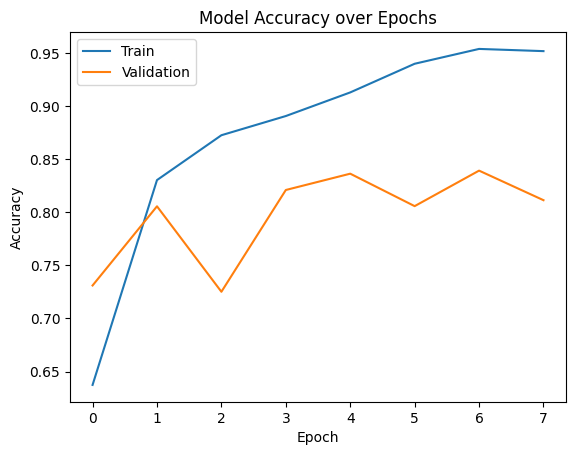

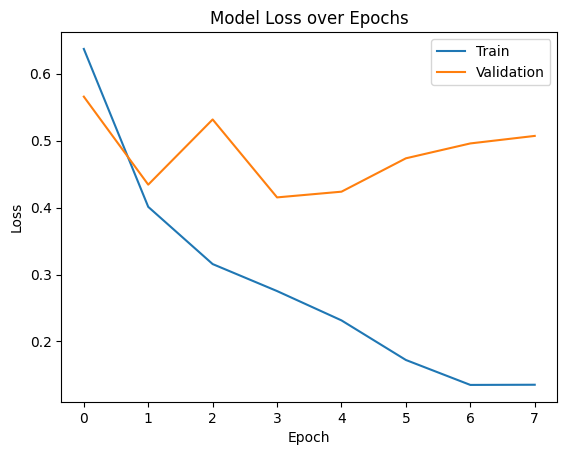

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
Predicted Sentiment: Negative


In [1]:
# 1. Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# 2. Updated parameters for the dataset
max_features = 15000   # Increased vocabulary size
maxlen = 300           # Shorter max sequence length

# 3. Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 4. Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# 5. Build the updated RNN model
model = Sequential()

# Updated embedding dimension to 64
model.add(Embedding(max_features, 64))

# Increased RNN units to 64
model.add(SimpleRNN(64))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# 6. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Train the model with new hyperparameters
history = model.fit(
    x_train,
    y_train,
    epochs=8,            # Increased epochs
    batch_size=128,      # Increased batch size
    validation_split=0.25  # More validation data
)

# 8. Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# 9. Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 10. Predict sentiment on a sample review
sample_review = x_test[0]
sample_review_input = np.expand_dims(sample_review, axis=0)
prediction = model.predict(sample_review_input)[0][0]

# Interpret prediction
if prediction > 0.5:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")


⭐ Complete Updated Code (Good Train/Validation Performance)

Epoch 1/6
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.5047 - loss: 0.7211 - val_accuracy: 0.4922 - val_loss: 0.6963
Epoch 2/6
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.5068 - loss: 0.7010 - val_accuracy: 0.4938 - val_loss: 0.7018
Epoch 3/6
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.5046 - loss: 0.6980 - val_accuracy: 0.5122 - val_loss: 0.6931
Epoch 4/6
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.5080 - loss: 0.6962 - val_accuracy: 0.4994 - val_loss: 0.6941
Epoch 5/6
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.5140 - loss: 0.6942 - val_accuracy: 0.5196 - val_loss: 0.6922
Epoch 6/6
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.5186 - loss: 0.6931 - val_accuracy: 0.5114 - val_loss: 0.6945
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5073 - loss: 0.6962
Test Accuracy: 0.50


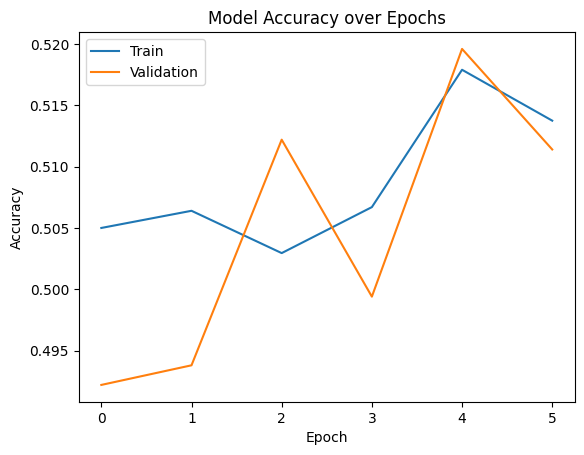

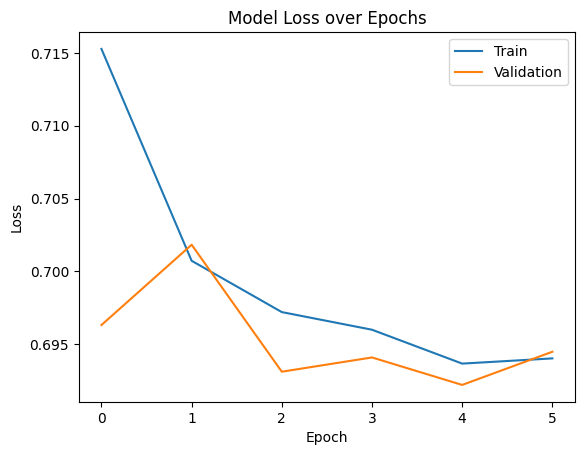

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
Predicted Sentiment: Negative


In [3]:
# 1. Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# 2. Updated parameters
max_features = 20000     # Larger vocabulary for better performance
maxlen = 300             # Sequence length

# 3. Load IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 4. Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# 5. Build the improved RNN model (SimpleRNN only)
model = Sequential()

# Embedding layer
model.add(Embedding(max_features, 128))

# Stronger version of SimpleRNN: Bidirectional + larger units + dropout
model.add(Bidirectional(SimpleRNN(64, dropout=0.3, recurrent_dropout=0.3)))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# 6. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Train the model
history = model.fit(
    x_train, y_train,
    epochs=6,
    batch_size=64,
    validation_split=0.2
)

# 8. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# 9. Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 10. Prediction
sample_review = x_test[0]
sample_review_input = np.expand_dims(sample_review, axis=0)
prediction = model.predict(sample_review_input)[0][0]

if prediction > 0.5:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")
